<h1>Regresión por minimos cuadrados</h1>
<hr>
<p>Cuando los datos tienen errores sustanciales, la interpolación polinomial es inapropiada y puede dar resultados poco satisfactorios cuando se utiliza para predecir valores intermedios. Con frecuencia los datos experimentales son de este tipo.
Una estrategia más apropiada en tales casos consiste en obtener una función de aproximación que se ajuste a la forma o a la tendencia general de los datos, sin coincidir necesariamente en todos los puntos.<p>









<p>La estrategia que supera las deficiencias  consiste en minimizar la suma de los cuadrados de los residuos entre la $y$ medida y la $y$ calculada con el modelo lineal.</p>
> $$S_r = \sum_{i=1}^n e^2_i = \sum_{i=1}^n (y_i,medida - y_i,modelo)^2 = \sum_{i=1}^n (y_i - a_0 - a_1x_i)^2$$
 

<h3>Criterio para un “mejor” ajuste</h3>
<p>Una estrategia para ajustar una $“mejor”$ línea a través de los datos será minimizar
la suma de los errores residuales de todos los datos disponibles, como sigue:</p>

>  $$\sum_{i=1}^n e = \sum_{i=1}^n (y_i – a_0 – a_1 x_i)$$

<p>Este criterio tiene varias ventajas, entre ellas el hecho de que se obtiene una línea única para cierto conjunto de datos.</p>

<h3>Ecuaciones Normales</h3>
> $$ a_1 = \frac{n\sum x_iy_i - \sum x_i \sum y_i}{n∑x^2_xi - (\sum x_i)^2} $$

<p>Este resultado se utiliza conjuntamente con la ecuación anterior para obtener</p>

> $$ a_0 = ȳ - a_1x̄ $$

<p>Donde $ȳ$ y $x̄$ son las medias de $y$ y $x$, respectivamente.</p>

<h3>Cuantificación del error en la regresión lineal</h3>
<p>El cuadrado del residuo representa el cuadrado de la distancia vertical entre el dato y la  medida de tendencia central. Tenemos la siguiente ecuacion.</p>

>  $$ (y_i - a_0 - a_1 x_1)^2$$

Es posible demostrar que si los siguientes criterios se cumplen, la regresión por mínimos cuadrados proporcioná la mejor o la mas adecuada estimación de $a_0$ y $a_1$:
<lo>
    <li><em>La dispersión de los  puntos alrededor de la línea es de magnitud similar en todo el rango de los datos.</em>
    </li>
    <li> <em>La distribucion de estos puntos cerca de la linea es normal.</em></li>
</lo>
<img src="imagen1.png" alt="Drawing" style="width: 300px;" />

<h3>Error estándar de la estimacion </h3>
<p> El subíndice $y/x$ designa que el error es
para un valor predicho de $y$ correspondiente a un valor particular de $x$. También, observe que ahora
dividimos entre $n – 2$ debido a que se usaron dos datos estimados ($a_0$ y $a_1$), para calcular $Sr$ ; así, se
han perdido dos grados de libertad. </p>

> $$ S_r = \sum(y_i - a_0 - a_1 x_1)^2$$


> $$ S_{x/y} = \sqrt{\frac{S_r}{n-2}} $$

<p>otra justificación para dividir entre $n – 2$ es que no existe algo
como “datos dispersos” alrededor de una línea recta que une dos puntos.
De esta manera, en el caso donde $n = 2$, la ecuación anterior da un resultado
sin sentido, infinito.</p>

<h3> Coeficiente de Determinacion </h3>

El coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo.

> $$ r^2 = \sqrt{\frac{S_{xy}}{S_xS_y}}$$

<h3> Coeficiente de correlación de Pearson </h3>

Podemos definir el coeficiente de correlación de Pearson como un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas. 
- Decimos que la correlación entre dos variables $x$ e $y$ es perfecta positiva cuando exactamente en la medida que aumenta una de ellas aumenta la otra. Esto sucede cuando la relación entre ambas variables es funcionalmente exacta.  
- Se dice que la relación es perfecta negativa cuando exactamente en la medida que aumenta una variable disminuye la otra

La funcion se ilustra a continuacion:

> $$ r = \frac{S_{xy}}{S_xS_y} $$

<h5>Covarianza</h5>
> $$ S_{xy} = \frac{\sum (y-ȳ) (x-x̄)}{n} $$

<h5>Desviacion estandar de $y$</h5>
> $$ S_{y} = \sqrt{\frac{\sum (y-ȳ)^2}{n}} $$

<h5>Desviacion estandar de $x$</h5>
> $$ S_{x} = \sqrt{\frac{\sum (x-x̄)^2}{n}} $$

In [1]:
import numpy as np    # Importamos numpy para realizar calculos entre vectores, sumas, multiplicaciones, etc.
import pylab as pl    # Importamos pylab para graficar los datos y la recta.
from decimal import * # Importamos la liberia decimal para tener mayor precision en los calculos.
import math           # Importamos la libreria math para realizar las operacion matematicas necesarias en minimos cuadrados 
import pandas as pd   # Importamos pandas para generar un documento de excel con los datos obtenidos y visualizarlos en tablas


In [24]:
    class LeastSquares:
        def __init__(self, x, y):
            self.__x = x
            self.__y = y
            self.R   = 0 # Coeficiente de correlacion
            self.R2  = 0 # Coeficiente de determinacion
            self.A1  = 0 # Pendiente
            self.A0  = 0 # Interseccion
            self.err = 0 # Error estandar
            self.__n = len(x)
        
        def getX(self):
            return self.__x
        
        def getY(self):
            return self.__y
        
        def setErr(self, err):
            self.__err = err
        
        def getSize(self): # Funcion que retorna el numero total de datos 
            return self.__n
        
        def summation(self, array): # Funcion para sumar todos los varores de un vector
            return np.sum(array)
    
        def mean(self, array): # Funcion que calcula la media de un vector
            return np.sum(array)/len(array)
         
        def standardDeviationX(self): # Funcion que calcula la desviacion estandar de X
            return math.sqrt(np.sum(self.DiferenceXAndMediaXSquares())/self.getSize())
        
        def standardDeviationY(self): #Funcion que calcula la desviacion estandar de Y
            return math.sqrt(np.sum(self.DiferenceYAndMediaYSquares())/self.getSize())
        
        def covariance(self): #Funcion que calcula la covarianza
            return np.sum(self.ProductYMediaY_XMediaX()) / self.getSize()
        
        def standardErr(self): #Funcion que calcula el error estandar
            self.err = math.sqrt(np.sum(self.SquareResidue()) / (self.getSize() - 2))
    
        def correlationCoefficient(self): #Funcion que calcula el coeficiente de correlacion del modelo
            self.R = self.covariance() /(self.standardDeviationX() * self.standardDeviationY())
        
        def determinationCoefficient(self): #Funcion que calcula el coeficiente de determinacion del modelo
            self.R2 =  (self.covariance() /(self.standardDeviationX() * self.standardDeviationY()))**2
        
        def normalEquationsB(self): # Ecuacion normal A1  de minimos cuadrados
            numerador = self.getSize() * np.sum(self.ProductXY()) - np.sum(self.getX()) * np.sum(self.getY())
            denominador = self.getSize() * np.sum(self.getX()**2) - (np.sum(self.getX()))**2
            self.A1 =  numerador / denominador
        
        def normalEquationsA(self): # Ecuacion normal A0  de minimos cuadrados
            self.A0 =  self.mean(self.getY()) - self.A1 * self.mean(self.getX())
        
        def DiferenceXAndMediaXSquares(self): # Funcion que calcula el cuadrado de  la diferenia entre las x y la media de las x.
            return (self.getX() - self.mean(self.  getX()))**2
        
        def DiferenceYAndMediaYSquares(self):  # Funcion que calcula el cuadrado de  la diferenia entre las y  la media de las y.
            return (self.getY() - self.mean(self.getY()) )**2
        
        def ProductYMediaY_XMediaX(self): # Funcion que calcula el producto entre  (x-xmedia)(y-ymedia)
            return (self.getX() - self.mean(self.  getX())) * (self.getY() - self.mean(self.getY()))
        
        def ProductXY(self): # Funcion que calcula el producto xy
            return self.getY() * self.getX()
        
        def DiferenceXAndMediaX(self): # Funcion que calcula x - xmedia
            return (self.getX() - self.mean(self.  getX()))
        
        def DiferenceYAndMediaY(self): # Funcion que calcula y - ymedia
            return (self.getY() - self.mean(self.getY()))
        
         #Funcion que calcula la distancia vertical entre el dato y la
         #medida de tendencia central: la línea recta.
        def SquareResidue(self):
            return (self.getY() - self.A0 - self.A1 * self.getX())**2
        
        #Funcion que retorna el listado de los resultados del modelo en una tabla
        def getResultTotal(self):
            self.standardErr()
            df = pd.DataFrame([
            np.sum(self.getX()),
            np.sum(self.getY()),
            np.sum(self.getX()**2),
            np.sum(self.getY()**2),
            np.sum(self.DiferenceXAndMediaXSquares()),
            np.sum(self.DiferenceYAndMediaYSquares()),
            np.sum(self.ProductYMediaY_XMediaX()),
            np.sum(self.ProductXY()),
            np.sum(self.SquareResidue()),
            self.R,
            self.R2,
            self.A1,
            self.A0,
            self.err
            ], 
            index=['Σx', 'Σy', 'x²', 'y²', '(x-x̄)²', '(y-ȳ)²', '(x-x̄)(y-ȳ)', 'xy', '(y – A0 - A1X)²', 'R', 'R²', 'Pendiente','Intersección','Error Estandar'], columns=[''])
            return df
       
        # Funcion que retorna el listado de los datos calculados del modelo
        def getData(self):
            data = {
            '(x-x̄)(y-ȳ)' : self.ProductYMediaY_XMediaX(), 
            'x²' : self.getX()**2,
            'y²' : self.getY()**2,
            'x-x̄' : self.DiferenceXAndMediaX(),
            'y-ȳ' : self.DiferenceYAndMediaY(),
            '(x-x̄)²' : self.DiferenceXAndMediaXSquares(),
            '(y-ȳ)²' : self.DiferenceYAndMediaYSquares(),
            'xy' : self.ProductXY(),
            '(y – A0 - A1x)²' : self.SquareResidue()
            }
            self.normalEquationsB()         # Cargamos A1
            self.normalEquationsA()         # Cargamos A0
            self.correlationCoefficient()   # Cargamos R
            self.determinationCoefficient() # Cargamos R2
            df = pd.DataFrame(data)
            return df
        
        def getDataInitial(self): # Visualizar x y y 
            data = {
                'y' : self.getY(),
                'x' : le.getX()
            }
            df = pd.DataFrame(data)
            return df
        
        def getScatterDiagram(self, X, Y): #VIsualizar diagrama de dispersion 
            pl.plot(X,Y, 'o', label='Datos')
            pl.xlabel('x')
            pl.ylabel('y')
            pl.title('Regresion lineal')
            pl.grid()
            pl.legend(loc=4)
            pl.show()
        
        def getAdjustmentLine(self): # VIsualizar linea de ajuste por minimos cuadrados
            A1 = self.A1
            A0 = self.A0
            print(A1)
            print(A0)
            pl.plot(self.getX(),self.getY(), 'o', label='Datos')
            pl.plot(self.getX(),  A1*self.getX() +A0 , label="Ajuste")
            pl.xlabel('x')
            pl.ylabel('y')
            pl.title('Regresion lineal')
            pl.grid()
            pl.legend(loc=4)
            pl.show()


<b>PLANTEAMIENTO DE PROBLEMA:</b>

> Se obtuvieron unas muestras de alturas redondeadas en centimetros y los pesos
> en kilogramos de una muestra de 12 estudiantes del primer año de una determinada
> Universidad. 
- Obtenga el peso aproximado de un estudiante con 190 de estatura.

In [25]:
X = np.array([178, 160, 183, 152, 168, 178, 188, 165, 157, 170, 165, 173])         # Alturas
Y = np.array([69.8, 67.5, 81, 60.8, 70.2, 75.6, 80.1, 72, 59.4, 65.3, 62.6, 68.4]) # Pesos
le = LeastSquares(X, Y)  # Instantanciamos la clase para minimos cuadrados.
le.getDataInitial() # Visualizamos los valores de x y y

,x,y
0,178,69.8
1,160,67.5
2,183,81.0
3,152,60.8
4,168,70.2
5,178,75.6
6,188,80.1
7,165,72.0
8,157,59.4
9,170,65.3


> El primer paso en cualquier análisis de regresión deberá ser graficar e inspeccionar los datos en forma visual, para asegurarnos que sea posible usar un modelo lineal.

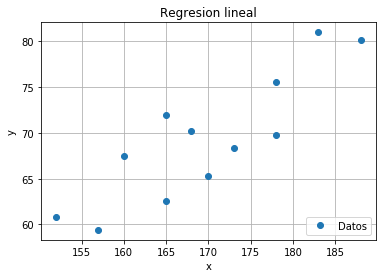

In [26]:
le.getScatterDiagram(X,Y) # Graficamos los puntos

> <p>Realizamos las operaciones necesarias para establecer una recta de ajuste.</p>

In [27]:
le.getData() # Calculamos los datos necesarios mediante las formulas de minimos cuadrados.

,(x-x̄)(y-ȳ),(x-x̄)²,(y – A0 - A1x)²,(y-ȳ)²,x-x̄,xy,x²,y-ȳ,y²
0,3.368750,68.0625,4872.04,0.166736,8.25,12424.4,31684,0.408333,4872.04
1,18.443750,95.0625,4556.25,3.578403,-9.75,10800.0,25600,-1.891667,4556.25
2,153.810417,175.5625,6561.00,134.753403,13.25,14823.0,33489,11.608333,6561.00
3,152.502083,315.0625,3696.64,73.816736,-17.75,9241.6,23104,-8.591667,3696.64
4,-1.414583,3.0625,4928.04,0.653403,-1.75,11793.6,28224,0.808333,4928.04
5,51.218750,68.0625,5715.36,38.543403,8.25,13456.8,31684,6.208333,5715.36
6,195.427083,333.0625,6416.01,114.668403,18.25,15058.8,35344,10.708333,6416.01
7,-12.389583,22.5625,5184.00,6.803403,-4.75,11880.0,27225,2.608333,5184.00
8,127.393750,162.5625,3528.36,99.833403,-12.75,9325.8,24649,-9.991667,3528.36
9,-1.022917,0.0625,4264.09,16.741736,0.25,11101.0,28900,-4.091667,4264.09


<h3>Linea de ajuste por minimos cuadrados.</h3>

<p>Una vez calculados todos los valores procedemos a realizar la linea de ajuste.</p>

0.5613124387855196
-25.891119817175294


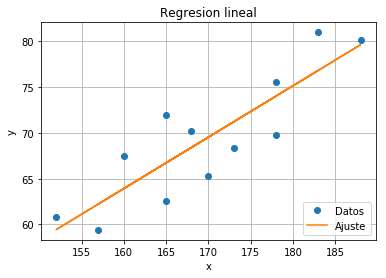

In [28]:
le.getAdjustmentLine()

- Se obtienen como resultado los anteriores datos aplicando las funciones de minimos cuadrados. Y a continuacion visualizamos las sumatorias y resultados de las funciones, de esta manera tenemos una informacion mas detallada del modelo planteado.

In [29]:
le.getResultTotal()

,
Σx,2037.000000
Σy,832.700000
x²,347057.000000
y²,58319.110000
(x-x̄)²,1276.250000
(y-ȳ)²,536.669167
(x-x̄)(y-ȳ),716.375000
xy,142067.200000
(y – A0 - A1X)²,134.558968
R,0.865604


<h3> Analisis </h3>
<h5> Coeficiente de Correlacion </h5>
<p> Se obtuvo un coeficiente de correlacion de aproximadamente un $86$%. Esto quiere decir que el las variables $ x $ e $ y $ tienen una correlacion buena positiva en vista de que la correlacion esta entre $0,7$ y $1$. Se puede concluir para este modelo que entre mas aumenta la estatura, mas aumenta el peso.<p>
   
 |  | Descripcion
--- | --- | ---
-1  | -0,7 | Correlación Negativa buena (Inversa)
-0,7| -0,4 | Correlación Negativa Regular 
-0,4| 0    | Correlación  Mala (Nula)
0	| 0,4  | Correlación  Mala (Nula)
0,4	| 0,7  | Correlación  Positiva Regular 
0,7	| 1    | Correlación Positiva Buena (Directa)


 <h5> Coeficiente de Determinacion </h5>
<p> Se obtuvo un coeficiente de determinacion de aproximadamente un $75$%. Esto quiere decir que podemos trazar una linea recta que pase por todos los puntos con un $75$% de precision. <p>
> $$y = a_0 + a_1x$$

Una vez hayada la funcion de ajuste procedemos a realizar el punto anteriormente planteado:
- Obtenga el peso aproximado de un estudiante con 190 cm de estatura.



In [30]:
x = 190 # Estatura
y = le.A0+le.A1*x          
df = pd.DataFrame([y], index=['Peso'],  columns=[''])
df

,
Peso,80.758244



<b>Fuentes:</b>
- *Métodos numéricos para ingenieros, Sexta edición, Steven C. Chapra & Raymond P. Canale*